In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib



# Working with ECoG data


MNE supports working with more than just MEG and EEG data. Here we show some
of the functions that can be used to facilitate working with
electrocorticography (ECoG) data.



In [2]:
# Authors: Eric Larson <larson.eric.d@gmail.com>
#          Chris Holdgraf <choldgraf@gmail.com>
#
# License: BSD (3-clause)

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from mayavi import mlab

import mne
from mne.viz import plot_alignment, snapshot_brain_montage

print(__doc__)

Let's load some ECoG electrode locations and names, and turn them into
a :class:`mne.channels.DigMontage` class.



In [3]:
mat = loadmat(mne.datasets.misc.data_path() + '/ecog/sample_ecog.mat')
ch_names = mat['ch_names'].tolist()
elec = mat['elec']
dig_ch_pos = dict(zip(ch_names, elec))
mon = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)
print('Created %s channel positions' % len(ch_names))

Now that we have our electrode positions in MRI coordinates, we can create
our measurement info structure.



In [4]:
info = mne.create_info(ch_names, 1000., 'ecog', montage=mon)

We can then plot the locations of our electrodes on our subject's brain.

<div class="alert alert-info"><h4>Note</h4><p>These are not real electrodes for this subject, so they
          do not align to the cortical surface perfectly.</p></div>



In [5]:
subjects_dir = mne.datasets.sample.data_path() + '/subjects'

mlab.init_notebook()

fig = plot_alignment(info, subject='sample', subjects_dir=subjects_dir,
                     surfaces=['pial'])
mlab.view(200, 70)
mlab.show()

Sometimes it is useful to make a scatterplot for the current figure view.
This is best accomplished with matplotlib. We can capture an image of the
current mayavi view, along with the xy position of each electrode, with the
`snapshot_brain_montage` function.



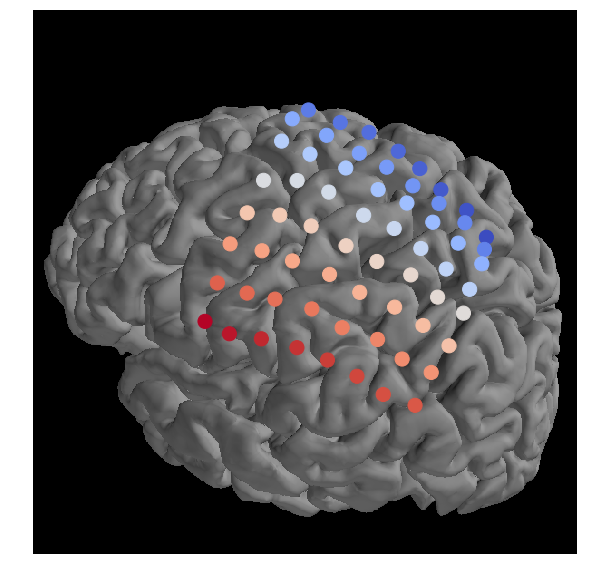

In [6]:
# We'll once again plot the surface, then take a snapshot.
fig = plot_alignment(info, subject='sample', subjects_dir=subjects_dir,
                     surfaces='pial')
mlab.view(200, 70)
xy, im = snapshot_brain_montage(fig, mon)

# Convert from a dictionary to array to plot
xy_pts = np.vstack(xy[ch] for ch in info['ch_names'])

# Define an arbitrary "activity" pattern for viz
activity = np.linspace(100, 200, xy_pts.shape[0])

# This allows us to use matplotlib to create arbitrary 2d scatterplots
_, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im)
ax.scatter(*xy_pts.T, c=activity, s=200, cmap='coolwarm')
ax.set_axis_off()
plt.show()